In [1]:
#/Users/vallirajasekar/Documents/LI_BFSI_01+-+Life+Insurance+Sales/Sales.xlsx

In [1]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/vallirajasekar/Desktop/Life Insurance Project/Notebooks


In [3]:
df=pd.read_csv('/Users/vallirajasekar/Desktop/Life Insurance Project/Notebooks/Life_Insurance.csv')

In [6]:
df=pd.read_csv('Life_Insurance.csv')

In [14]:
df=pd.read_excel('Sales.xlsx',sheet_name='Sales')

In [15]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [5]:
df_1=df.copy()

In [10]:
df.shape

(4520, 43)

In [11]:
df.columns

Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'ExistingProdType',
       'NumberOfPolicy', 'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure',
       'SumAssured', 'PaymentMethod', 'LastMonthCalls', 'CustCareScore',
       'Agent', 'Online', 'Third Party Partner', 'Free Lancer',
       'Large Business', 'Salaried', 'Small Business', 'Diploma', 'Engineer',
       'Graduate', 'MBA', 'Post Graduate', 'UG', 'Under Graduate', 'Female',
       'Male', 'AVP', 'Exe', 'Executive', 'Manager', 'Senior Manager', 'VP',
       'Divorced', 'Married', 'Single', 'Unmarried', 'East', 'North', 'South',
       'West'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4520 non-null   float64
 3   CustTenure            4520 non-null   float64
 4   ExistingProdType      4520 non-null   int64  
 5   NumberOfPolicy        4520 non-null   float64
 6   MonthlyIncome         4520 non-null   float64
 7   Complaint             4520 non-null   int64  
 8   ExistingPolicyTenure  4520 non-null   float64
 9   SumAssured            4520 non-null   float64
 10  PaymentMethod         4520 non-null   int64  
 11  LastMonthCalls        4520 non-null   int64  
 12  CustCareScore         4520 non-null   float64
 13  Agent                 4520 non-null   bool   
 14  Online                4520 non-null   bool   
 15  Third Party Partner  

In [13]:
df.isnull().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
ExistingProdType        0
NumberOfPolicy          0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
Agent                   0
Online                  0
Third Party Partner     0
Free Lancer             0
Large Business          0
Salaried                0
Small Business          0
Diploma                 0
Engineer                0
Graduate                0
MBA                     0
Post Graduate           0
UG                      0
Under Graduate          0
Female                  0
Male                    0
AVP                     0
Exe                     0
Executive               0
Manager                 0
Senior Manager          0
VP                      0
Divorced                0
Married                 0
Single                  0
Unmarried   

In [14]:
df.describe()

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,PaymentMethod,LastMonthCalls,CustCareScore
count,4.520000e+03,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4.520000e+03,4520.000000,4520.000000,4520.000000
mean,7.002260e+06,4077.838274,14.494707,14.469027,3.688938,3.565363,22890.309991,0.287168,4.130074,6.199997e+05,3.143805,4.626991,3.067592
std,1.304956e+03,1403.321711,8.764513,8.736655,1.015769,1.448659,4756.317536,0.452491,3.277551,2.420028e+05,0.791709,3.620132,1.374988
min,7.000000e+06,1605.000000,2.000000,2.000000,1.000000,1.000000,16009.000000,0.000000,1.000000,1.685360e+05,1.000000,0.000000,1.000000
25%,7.001130e+06,3027.750000,8.000000,8.000000,3.000000,2.000000,19858.000000,0.000000,2.000000,4.444762e+05,3.000000,2.000000,2.000000
50%,7.002260e+06,3911.500000,14.000000,14.000000,4.000000,4.000000,21877.000000,0.000000,3.000000,5.900125e+05,3.000000,3.000000,3.000000
75%,7.003389e+06,4867.250000,19.000000,19.000000,4.000000,5.000000,24531.750000,1.000000,5.000000,7.500105e+05,4.000000,8.000000,4.000000
max,7.004519e+06,9608.000000,58.000000,57.000000,6.000000,6.000000,38456.000000,1.000000,25.000000,1.838496e+06,4.000000,18.000000,5.000000


In [11]:
df.Age.describe()

count    4251.000000
mean       14.494707
std         9.037629
min         2.000000
25%         7.000000
50%        13.000000
75%        20.000000
max        58.000000
Name: Age, dtype: float64

In [15]:
df.isnull().sum()>0

CustID                  False
AgentBonus              False
Age                     False
CustTenure              False
ExistingProdType        False
NumberOfPolicy          False
MonthlyIncome           False
Complaint               False
ExistingPolicyTenure    False
SumAssured              False
PaymentMethod           False
LastMonthCalls          False
CustCareScore           False
Agent                   False
Online                  False
Third Party Partner     False
Free Lancer             False
Large Business          False
Salaried                False
Small Business          False
Diploma                 False
Engineer                False
Graduate                False
MBA                     False
Post Graduate           False
UG                      False
Under Graduate          False
Female                  False
Male                    False
AVP                     False
Exe                     False
Executive               False
Manager                 False
Senior Man

In [16]:
df.loc[:, df.isnull().sum() > 0]


""
0
1
2
3
4
...
4515
4516
4517
4518


In [17]:
df.Age.describe()

count    4520.000000
mean       14.494707
std         8.764513
min         2.000000
25%         8.000000
50%        14.000000
75%        19.000000
max        58.000000
Name: Age, dtype: float64

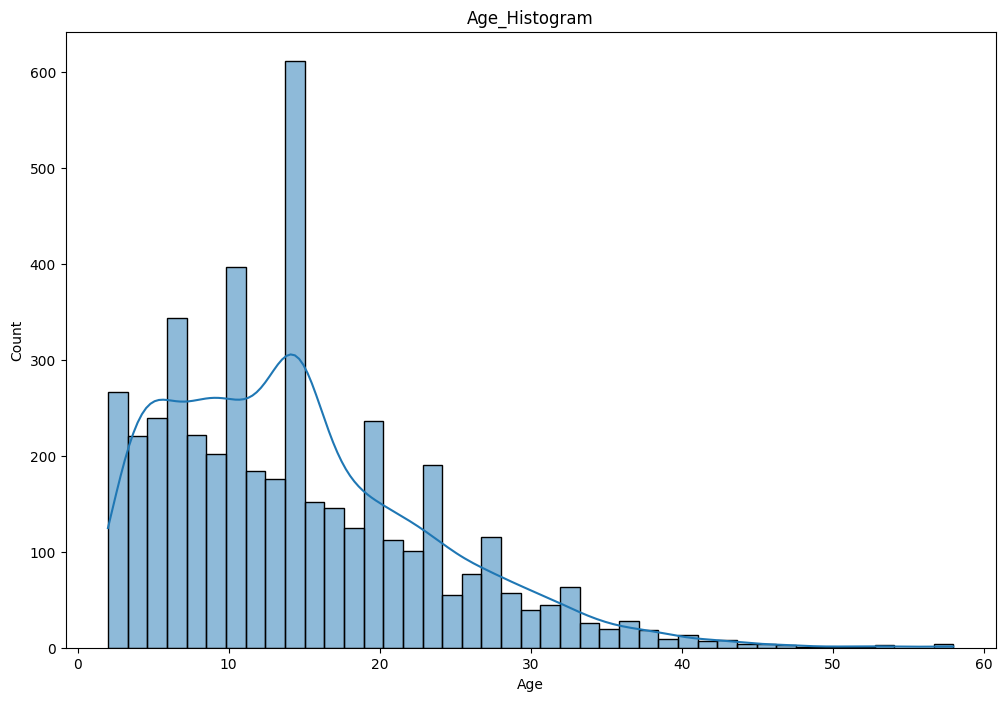

In [18]:
# The Age column is left Skewed and missing value is less than 30%

fig, ax = plt.subplots(figsize=(12, 8)) # set figure size

sns.histplot(df, x="Age", kde=True, ax=ax)
ax.set_xlabel("Age")
ax.set_title("Age_Histogram")

plt.show()


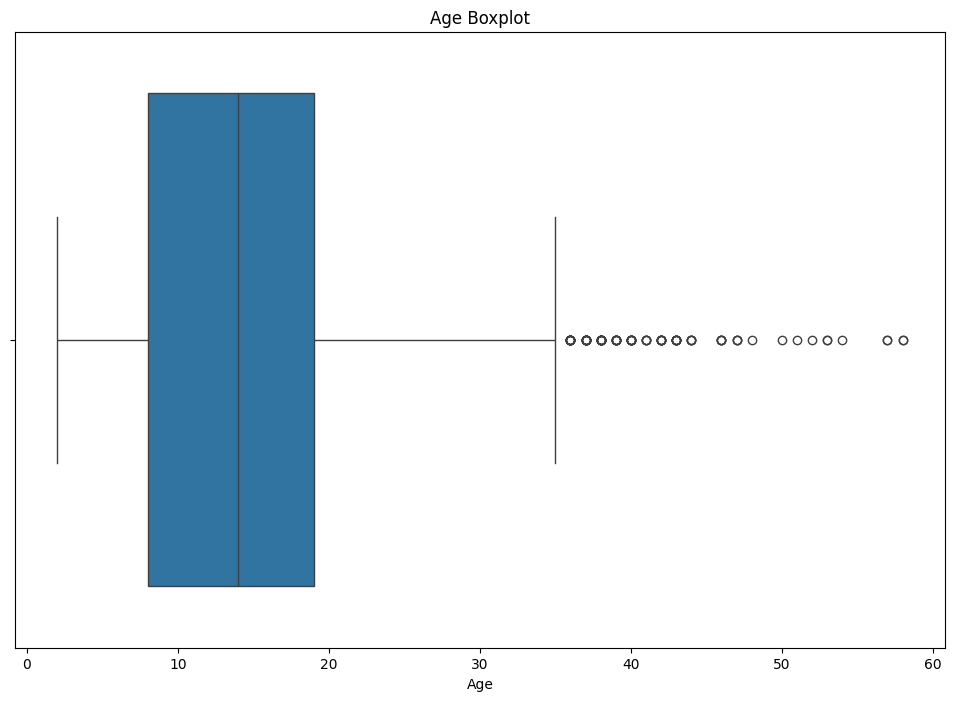

In [19]:

fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data=df, x='Age', ax=ax)

ax.set_xlabel("Age")
ax.set_title("Age Boxplot")

plt.show()


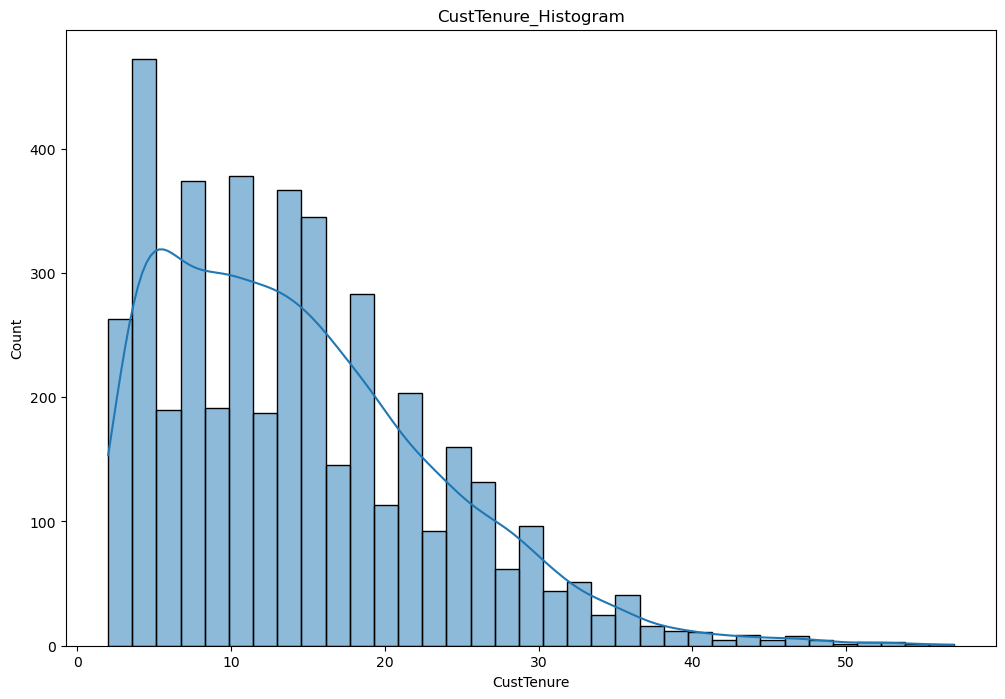

In [17]:
fig, ax = plt.subplots(figsize=(12, 8)) # set figure size

sns.histplot(df, x="CustTenure", kde=True, ax=ax)
ax.set_xlabel("CustTenure")
ax.set_title("CustTenure_Histogram")

plt.show()


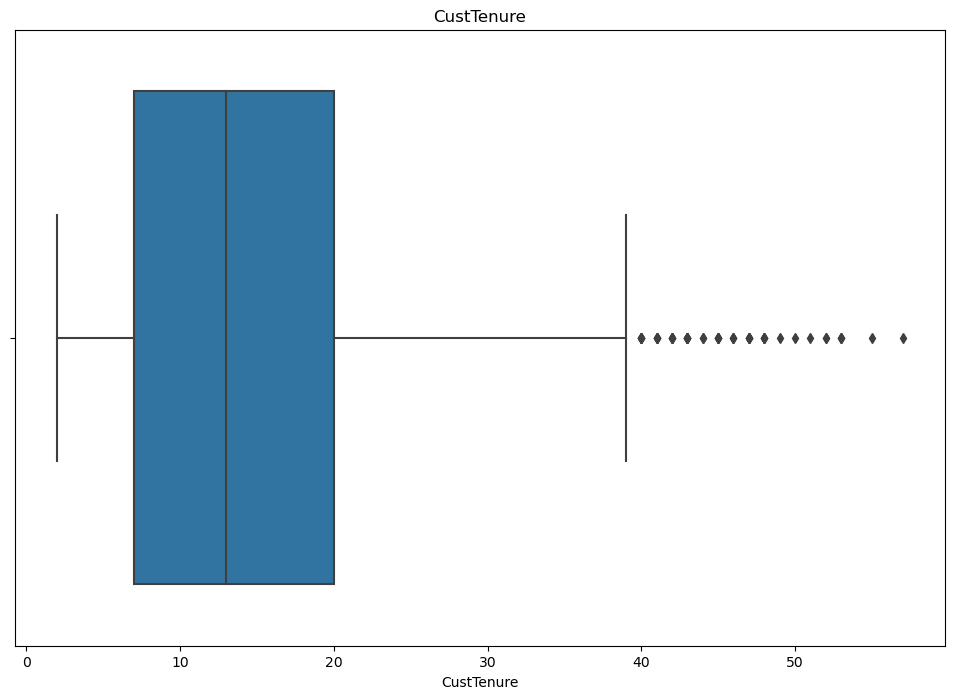

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data=df, x='CustTenure', ax=ax)

ax.set_xlabel("CustTenure")
ax.set_title("CustTenure")

plt.show()


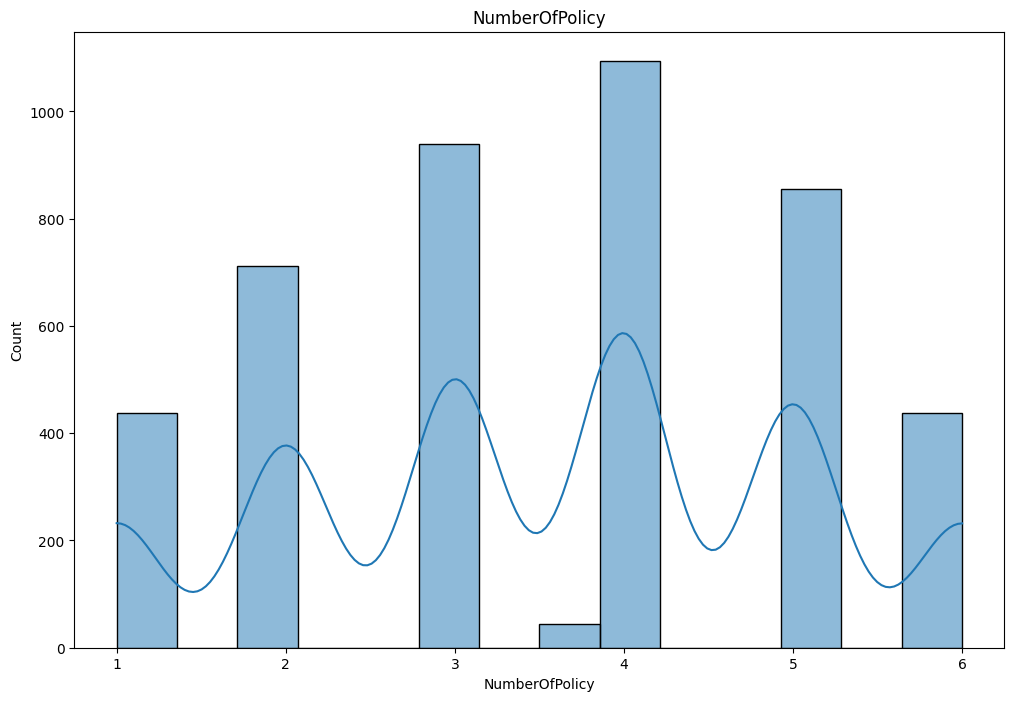

In [20]:
fig, ax = plt.subplots(figsize=(12, 8)) # set figure size

sns.histplot(df, x="NumberOfPolicy", kde=True, ax=ax)
ax.set_xlabel("NumberOfPolicy")
ax.set_title("NumberOfPolicy")

plt.show()


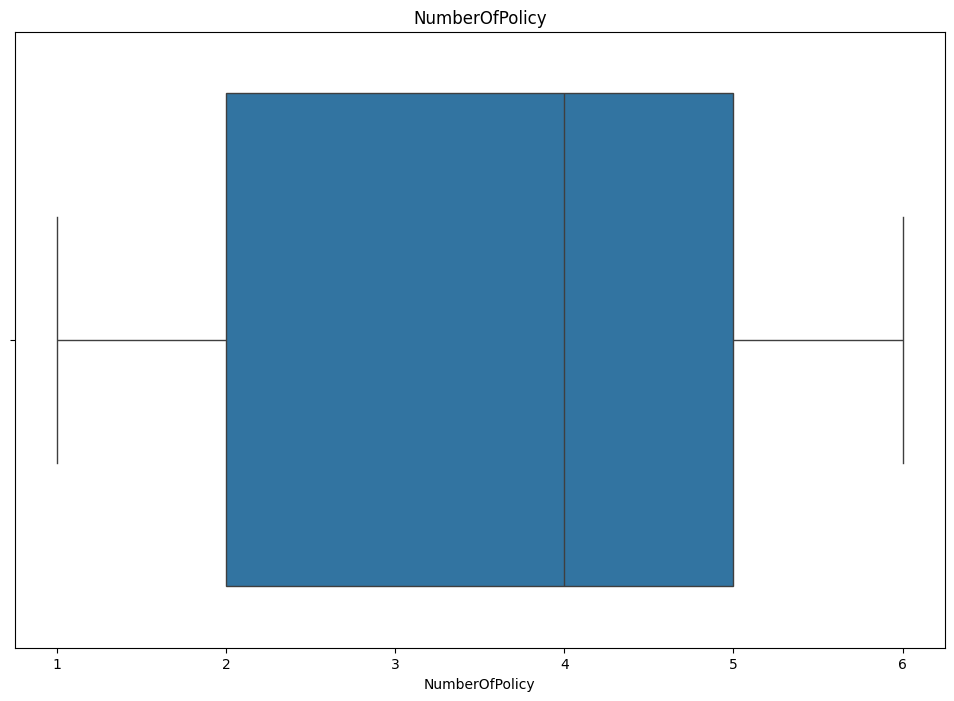

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data=df, x='NumberOfPolicy', ax=ax)

ax.set_xlabel("NumberOfPolicy")
ax.set_title("NumberOfPolicy")

plt.show()


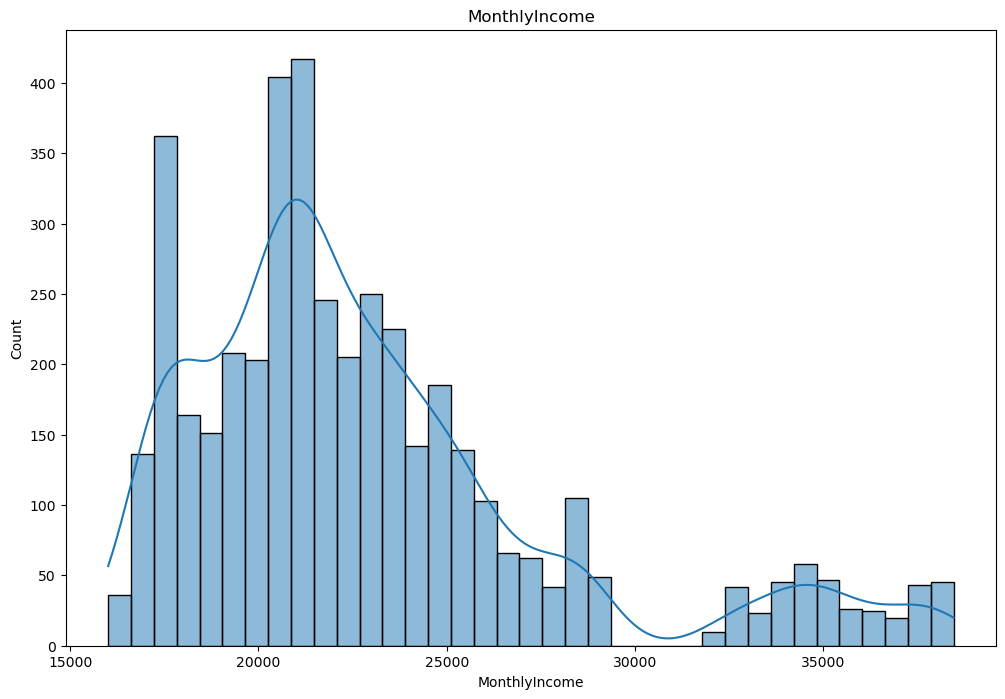

In [21]:

fig, ax = plt.subplots(figsize=(12, 8)) # set figure size

sns.histplot(df, x="MonthlyIncome", kde=True, ax=ax)
ax.set_xlabel("MonthlyIncome")
ax.set_title("MonthlyIncome")

plt.show()



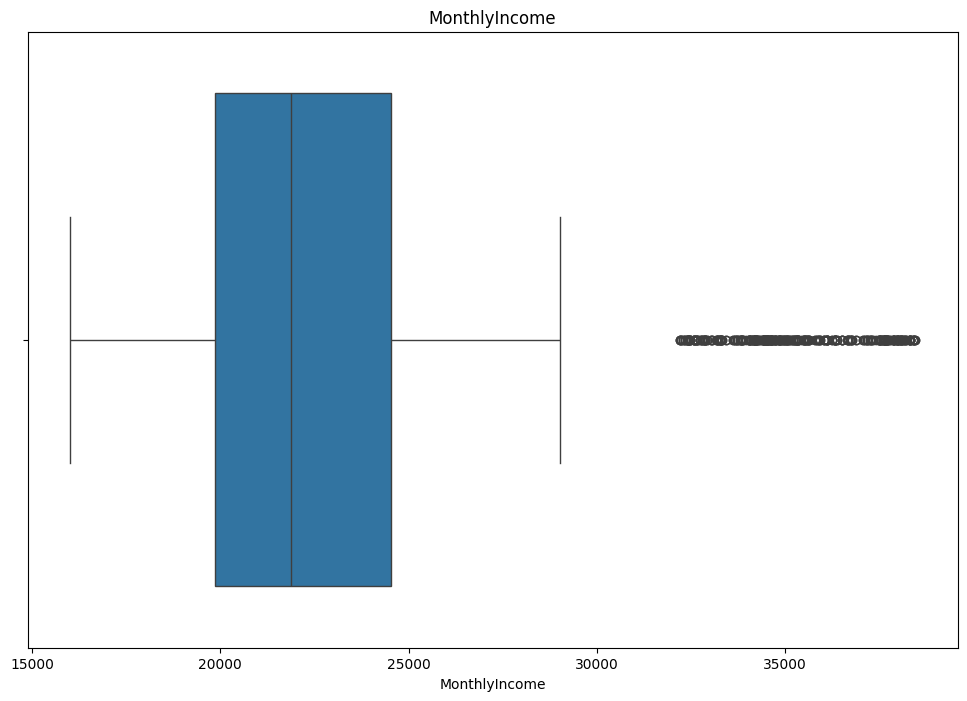

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data=df, x='MonthlyIncome', ax=ax)

ax.set_xlabel("MonthlyIncome")
ax.set_title("MonthlyIncome")

plt.show()



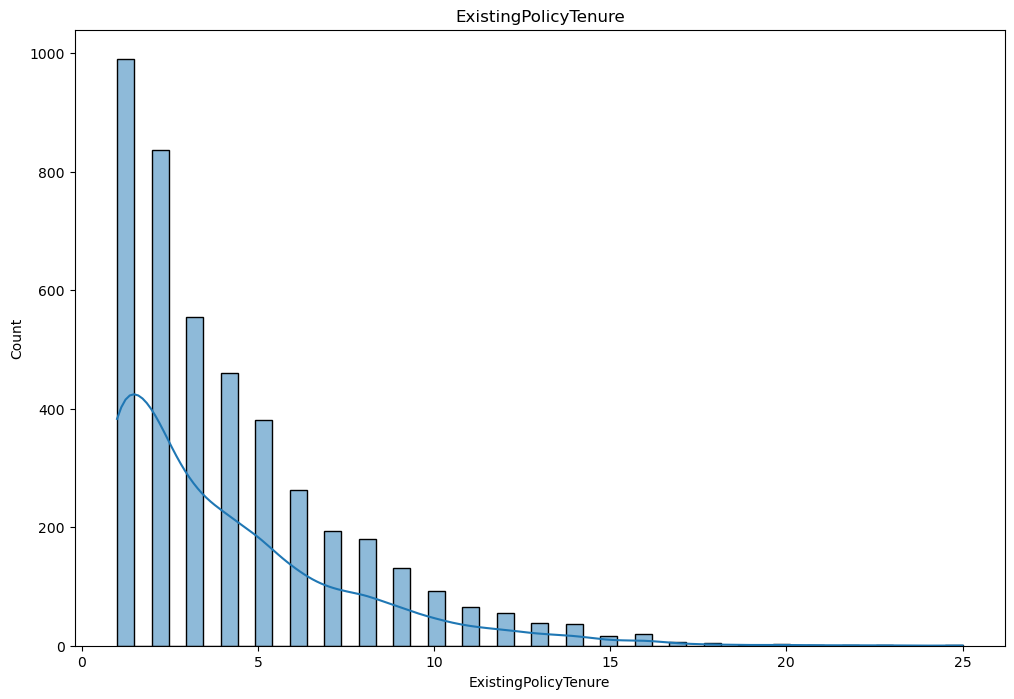

In [23]:

fig, ax = plt.subplots(figsize=(12, 8)) # set figure size

sns.histplot(df, x="ExistingPolicyTenure", kde=True, ax=ax)
ax.set_xlabel("ExistingPolicyTenure")
ax.set_title("ExistingPolicyTenure")

plt.show()


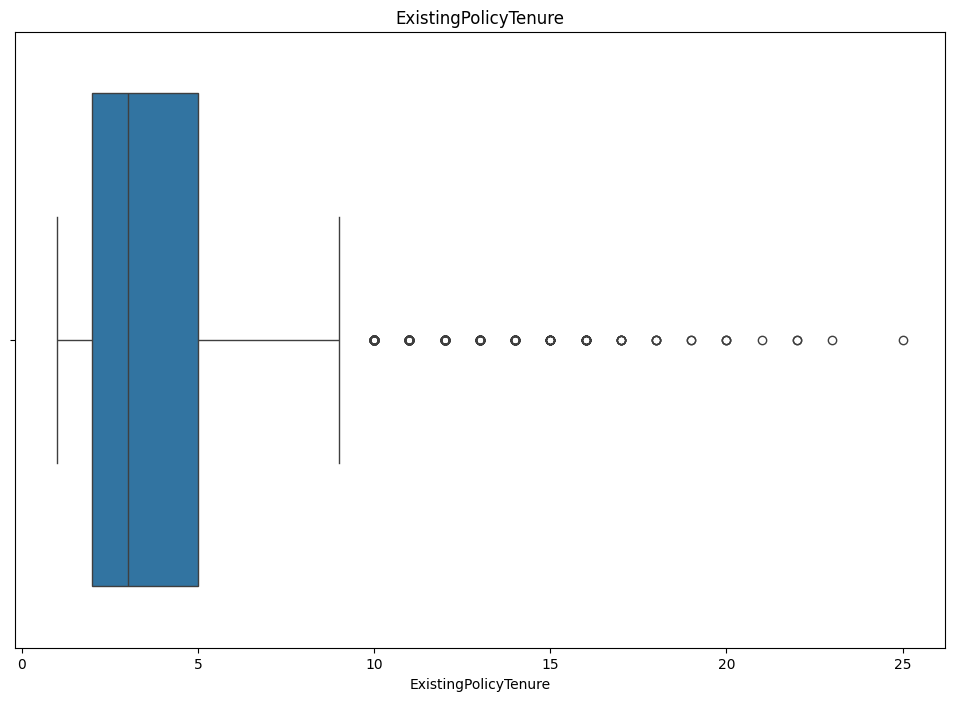

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data=df, x='ExistingPolicyTenure', ax=ax)

ax.set_xlabel("ExistingPolicyTenure")
ax.set_title("ExistingPolicyTenure")

plt.show()


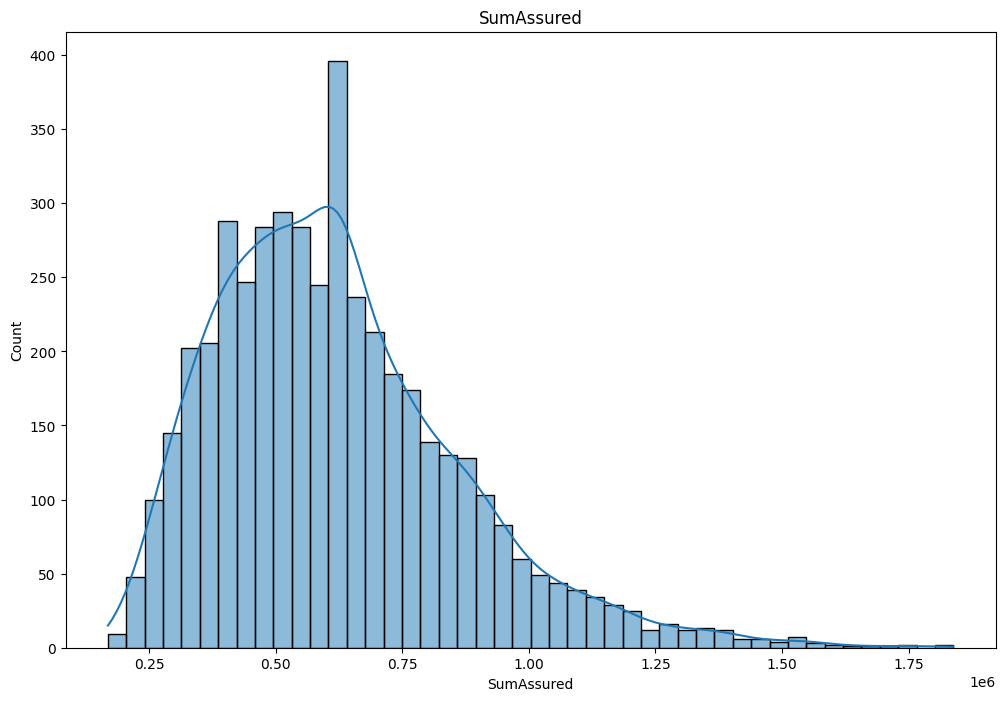

In [24]:


fig, ax = plt.subplots(figsize=(12, 8)) # set figure size

sns.histplot(df, x="SumAssured", kde=True, ax=ax)
ax.set_xlabel("SumAssured")
ax.set_title("SumAssured")

plt.show()




In [26]:
df.SumAssured.describe()

count    4.520000e+03
mean     6.199997e+05
std      2.420028e+05
min      1.685360e+05
25%      4.444762e+05
50%      5.900125e+05
75%      7.500105e+05
max      1.838496e+06
Name: SumAssured, dtype: float64

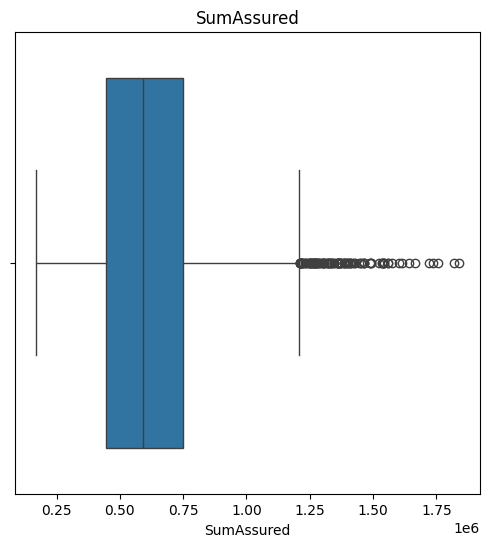

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.boxplot(data=df, x='SumAssured', ax=ax)

ax.set_xlabel("SumAssured")
ax.set_title("SumAssured")

plt.show()


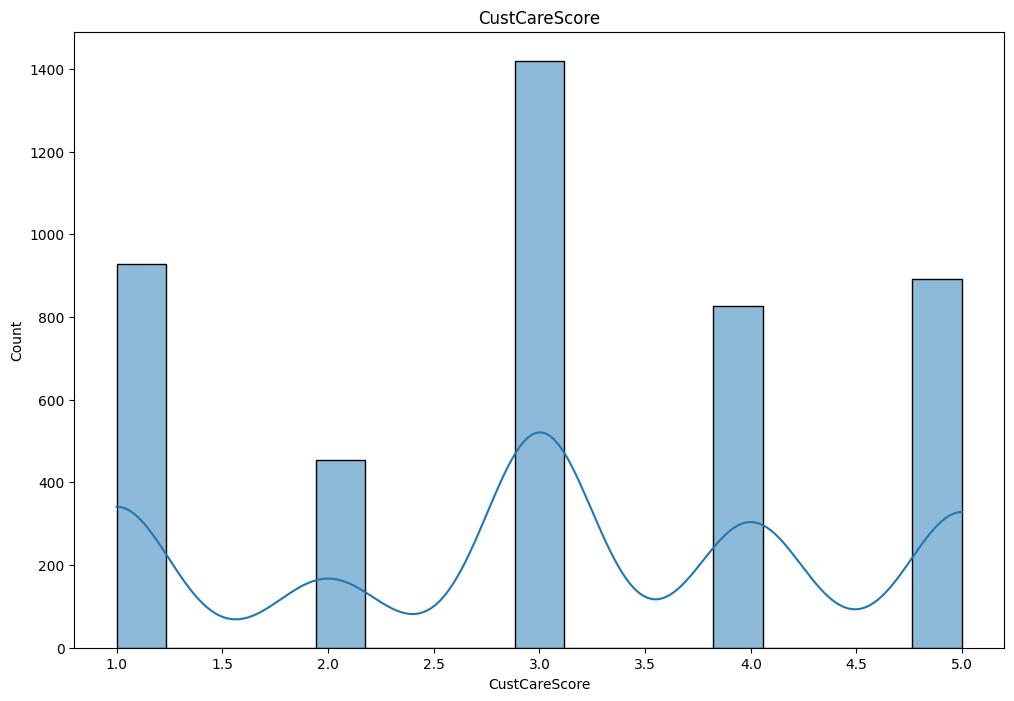

In [28]:

fig, ax = plt.subplots(figsize=(12, 8)) # set figure size

sns.histplot(df, x="CustCareScore", kde=True, ax=ax)
ax.set_xlabel("CustCareScore")
ax.set_title("CustCareScore")

plt.show()



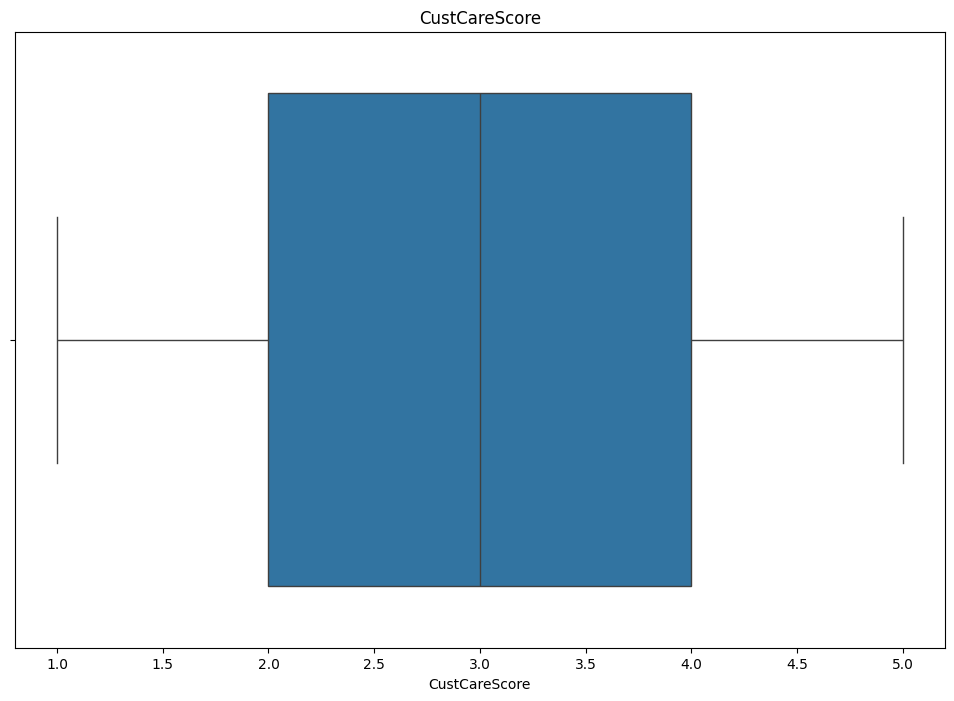

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data=df, x='CustCareScore', ax=ax)

ax.set_xlabel("CustCareScore")
ax.set_title("CustCareScore")

plt.show()


# IMPUTING MISSING VALUE

In [30]:
df.isnull().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
ExistingProdType        0
NumberOfPolicy          0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
Agent                   0
Online                  0
Third Party Partner     0
Free Lancer             0
Large Business          0
Salaried                0
Small Business          0
Diploma                 0
Engineer                0
Graduate                0
MBA                     0
Post Graduate           0
UG                      0
Under Graduate          0
Female                  0
Male                    0
AVP                     0
Exe                     0
Executive               0
Manager                 0
Senior Manager          0
VP                      0
Divorced                0
Married                 0
Single                  0
Unmarried   

In [31]:
df.describe()

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,PaymentMethod,LastMonthCalls,CustCareScore
count,4.520000e+03,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4.520000e+03,4520.000000,4520.000000,4520.000000
mean,7.002260e+06,4077.838274,14.494707,14.469027,3.688938,3.565363,22890.309991,0.287168,4.130074,6.199997e+05,3.143805,4.626991,3.067592
std,1.304956e+03,1403.321711,8.764513,8.736655,1.015769,1.448659,4756.317536,0.452491,3.277551,2.420028e+05,0.791709,3.620132,1.374988
min,7.000000e+06,1605.000000,2.000000,2.000000,1.000000,1.000000,16009.000000,0.000000,1.000000,1.685360e+05,1.000000,0.000000,1.000000
25%,7.001130e+06,3027.750000,8.000000,8.000000,3.000000,2.000000,19858.000000,0.000000,2.000000,4.444762e+05,3.000000,2.000000,2.000000
50%,7.002260e+06,3911.500000,14.000000,14.000000,4.000000,4.000000,21877.000000,0.000000,3.000000,5.900125e+05,3.000000,3.000000,3.000000
75%,7.003389e+06,4867.250000,19.000000,19.000000,4.000000,5.000000,24531.750000,1.000000,5.000000,7.500105e+05,4.000000,8.000000,4.000000
max,7.004519e+06,9608.000000,58.000000,57.000000,6.000000,6.000000,38456.000000,1.000000,25.000000,1.838496e+06,4.000000,18.000000,5.000000


In [32]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
#MonthlyIncome,ExistingPolicyTenure,SumAssured,CustCareScore
# Impute missing values in the Age column of df
df['Age'] = imputer.fit_transform(df[['Age']])
df['CustTenure']=imputer.fit_transform(df[['CustTenure']])
df['NumberOfPolicy']=imputer.fit_transform(df[['NumberOfPolicy']])
df['MonthlyIncome']=imputer.fit_transform(df[['MonthlyIncome']])
df['ExistingPolicyTenure']=imputer.fit_transform(df[['ExistingPolicyTenure']])
df['SumAssured']=imputer.fit_transform(df[['SumAssured']])
df['CustCareScore']=imputer.fit_transform(df[['CustCareScore']])




In [33]:
df.isnull().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
ExistingProdType        0
NumberOfPolicy          0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
Agent                   0
Online                  0
Third Party Partner     0
Free Lancer             0
Large Business          0
Salaried                0
Small Business          0
Diploma                 0
Engineer                0
Graduate                0
MBA                     0
Post Graduate           0
UG                      0
Under Graduate          0
Female                  0
Male                    0
AVP                     0
Exe                     0
Executive               0
Manager                 0
Senior Manager          0
VP                      0
Divorced                0
Married                 0
Single                  0
Unmarried   

In [34]:
df.describe()

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,PaymentMethod,LastMonthCalls,CustCareScore
count,4.520000e+03,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4.520000e+03,4520.000000,4520.000000,4520.000000
mean,7.002260e+06,4077.838274,14.494707,14.469027,3.688938,3.565363,22890.309991,0.287168,4.130074,6.199997e+05,3.143805,4.626991,3.067592
std,1.304956e+03,1403.321711,8.764513,8.736655,1.015769,1.448659,4756.317536,0.452491,3.277551,2.420028e+05,0.791709,3.620132,1.374988
min,7.000000e+06,1605.000000,2.000000,2.000000,1.000000,1.000000,16009.000000,0.000000,1.000000,1.685360e+05,1.000000,0.000000,1.000000
25%,7.001130e+06,3027.750000,8.000000,8.000000,3.000000,2.000000,19858.000000,0.000000,2.000000,4.444762e+05,3.000000,2.000000,2.000000
50%,7.002260e+06,3911.500000,14.000000,14.000000,4.000000,4.000000,21877.000000,0.000000,3.000000,5.900125e+05,3.000000,3.000000,3.000000
75%,7.003389e+06,4867.250000,19.000000,19.000000,4.000000,5.000000,24531.750000,1.000000,5.000000,7.500105e+05,4.000000,8.000000,4.000000
max,7.004519e+06,9608.000000,58.000000,57.000000,6.000000,6.000000,38456.000000,1.000000,25.000000,1.838496e+06,4.000000,18.000000,5.000000


In [35]:
df.columns

Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'ExistingProdType',
       'NumberOfPolicy', 'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure',
       'SumAssured', 'PaymentMethod', 'LastMonthCalls', 'CustCareScore',
       'Agent', 'Online', 'Third Party Partner', 'Free Lancer',
       'Large Business', 'Salaried', 'Small Business', 'Diploma', 'Engineer',
       'Graduate', 'MBA', 'Post Graduate', 'UG', 'Under Graduate', 'Female',
       'Male', 'AVP', 'Exe', 'Executive', 'Manager', 'Senior Manager', 'VP',
       'Divorced', 'Married', 'Single', 'Unmarried', 'East', 'North', 'South',
       'West'],
      dtype='object')

for col in df.columns:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

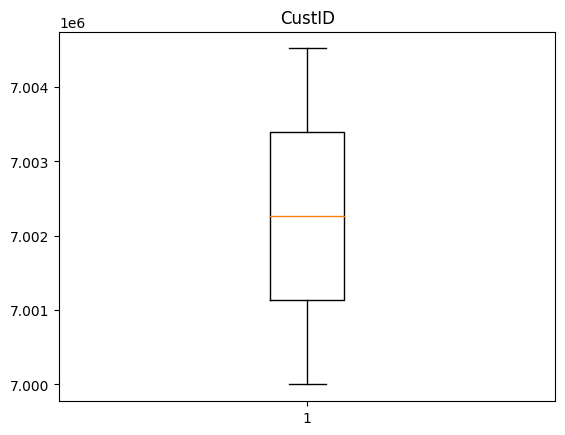

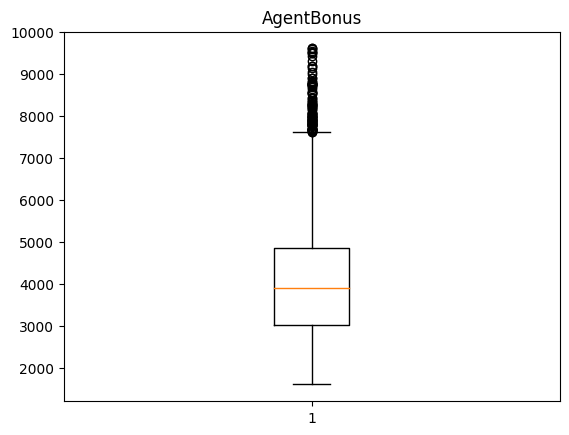

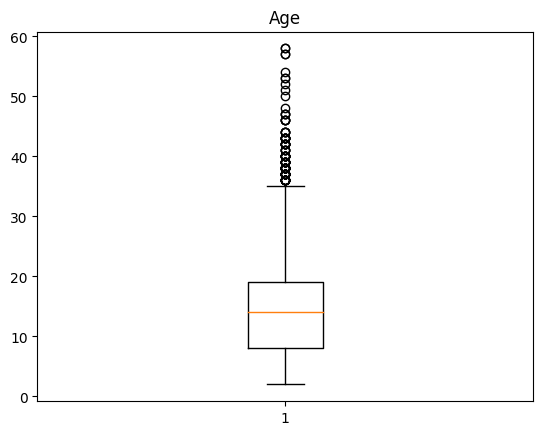

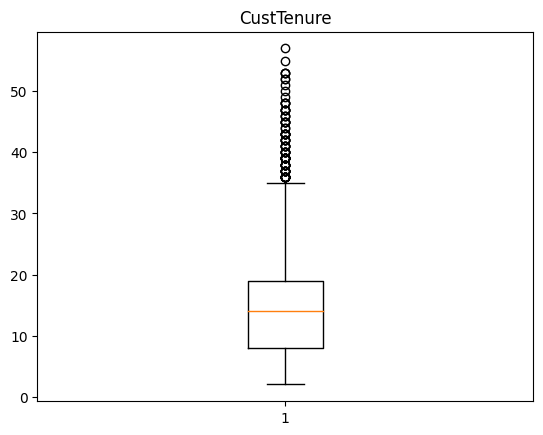

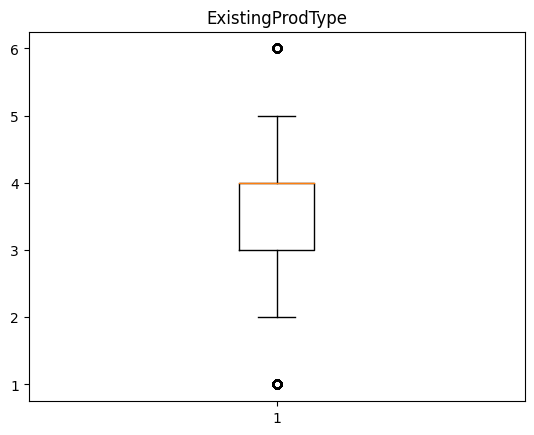

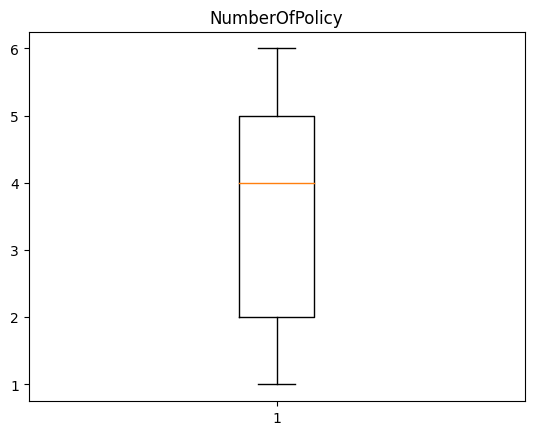

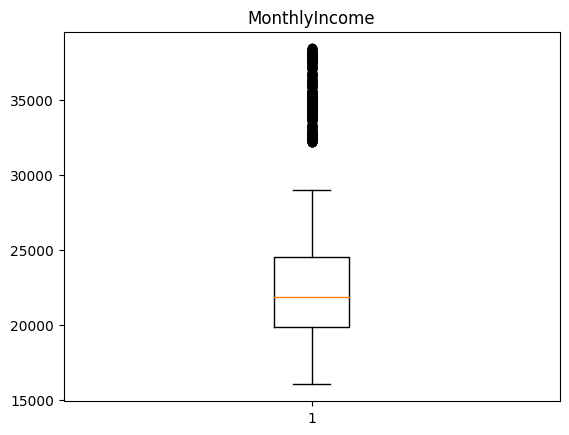

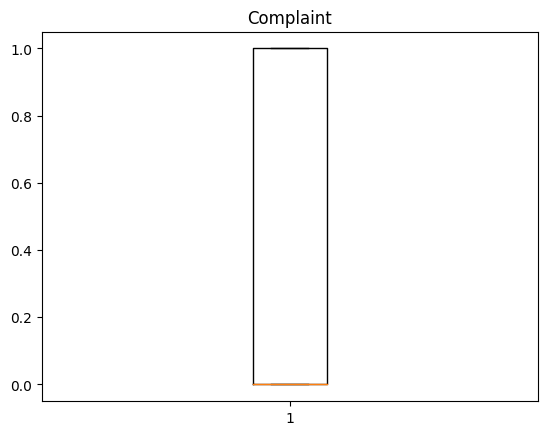

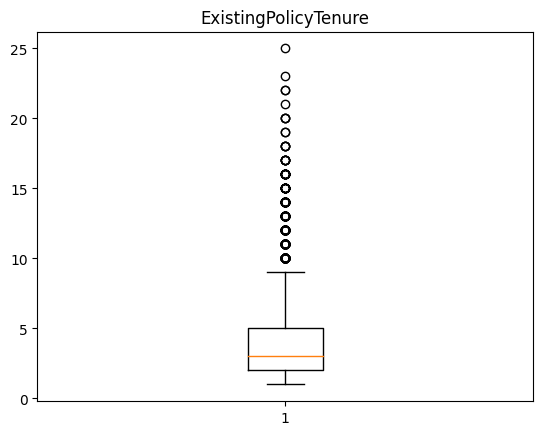

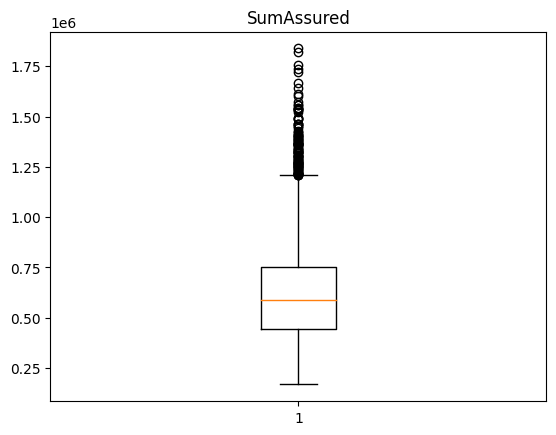

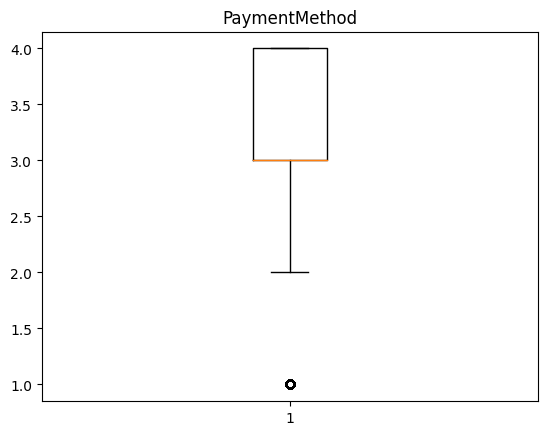

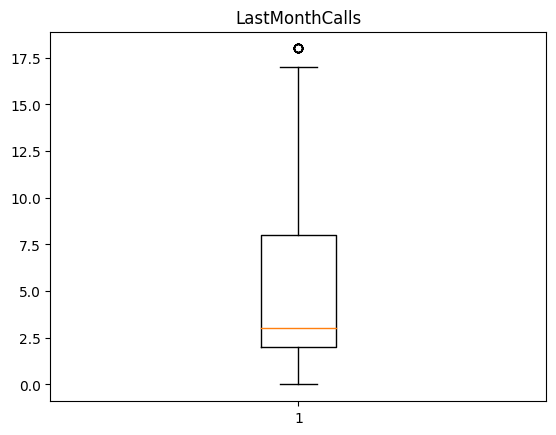

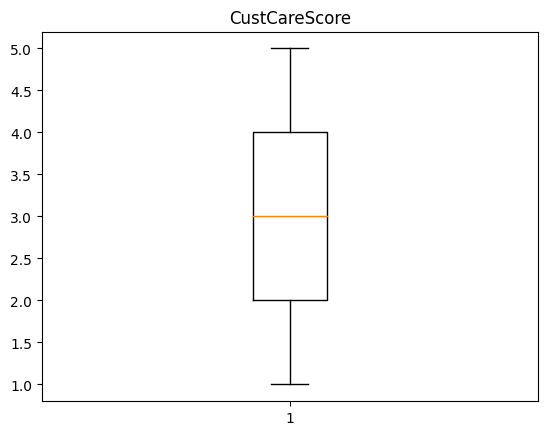

In [36]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']: # check if data is numeric
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()


# Converting object into Numerical 

In [37]:
df.head()

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,...,Senior Manager,VP,Divorced,Married,Single,Unmarried,East,North,South,West
0,7000000,4409,22.0,4.000000,3,2.0,20993.0,1,2.0,806761.000000,...,False,False,False,False,True,False,False,True,False,False
1,7000001,2214,11.0,2.000000,4,4.0,20130.0,0,3.0,294502.000000,...,False,False,True,False,False,False,False,True,False,False
2,7000002,4273,26.0,4.000000,4,3.0,17090.0,1,2.0,619999.699267,...,False,False,False,False,False,True,False,True,False,False
3,7000003,1791,11.0,14.469027,3,3.0,17909.0,1,2.0,268635.000000,...,False,False,True,False,False,False,False,False,False,True
4,7000004,2955,6.0,14.469027,3,4.0,18468.0,0,4.0,366405.000000,...,False,False,True,False,False,False,False,False,False,True


In [45]:
df.head()

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,...,Senior Manager,VP,Divorced,Married,Single,Unmarried,East,North,South,West
0,7000000,4409,22.0,4.000000,3,2.0,20993.0,1,2.0,806761.000000,...,False,False,False,False,True,False,False,True,False,False
1,7000001,2214,11.0,2.000000,4,4.0,20130.0,0,3.0,294502.000000,...,False,False,True,False,False,False,False,True,False,False
2,7000002,4273,26.0,4.000000,4,3.0,17090.0,1,2.0,619999.699267,...,False,False,False,False,False,True,False,True,False,False
3,7000003,1791,11.0,14.469027,3,3.0,17909.0,1,2.0,268635.000000,...,False,False,True,False,False,False,False,False,False,True
4,7000004,2955,6.0,14.469027,3,4.0,18468.0,0,4.0,366405.000000,...,False,False,True,False,False,False,False,False,False,True
